In [1]:
# 오류 메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
#데이터 불러오기
import pandas as pd
df_PCOS=pd.read_csv("../Data/pcos_colums_organize.csv")
df_PCOS.head(3)

,PCOS,Age,Weight,Height,BMI,Blood Type,Pulse rate,Cycle length,Marraige Status,Pregnant,...,Waist:Hip Ratio,Weight gain,hair growth,Skin darkening,Hair loss,Pimples,Fast food,Reg.Exercise,BP_Systolic,BP_Diastolic
0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,5.0,7.0,0.0,...,0.833333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,110.0,80.0
1,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,5.0,11.0,1.0,...,0.842105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,70.0
2,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,5.0,10.0,1.0,...,0.900000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,120.0,80.0


In [3]:
df_PCOS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PCOS             541 non-null    float64
 1   Age              541 non-null    float64
 2   Weight           541 non-null    float64
 3   Height           541 non-null    float64
 4   BMI              541 non-null    float64
 5   Blood Type       541 non-null    float64
 6   Pulse rate       541 non-null    float64
 7   Cycle length     541 non-null    float64
 8   Marraige Status  541 non-null    float64
 9   Pregnant         541 non-null    float64
 10  aborptions       541 non-null    float64
 11  Hip              541 non-null    float64
 12  Waist            541 non-null    float64
 13  Waist:Hip Ratio  541 non-null    float64
 14  Weight gain      541 non-null    float64
 15  hair growth      541 non-null    float64
 16  Skin darkening   541 non-null    float64
 17  Hair loss       

# 상관관계를 히트맵으로 보여주기

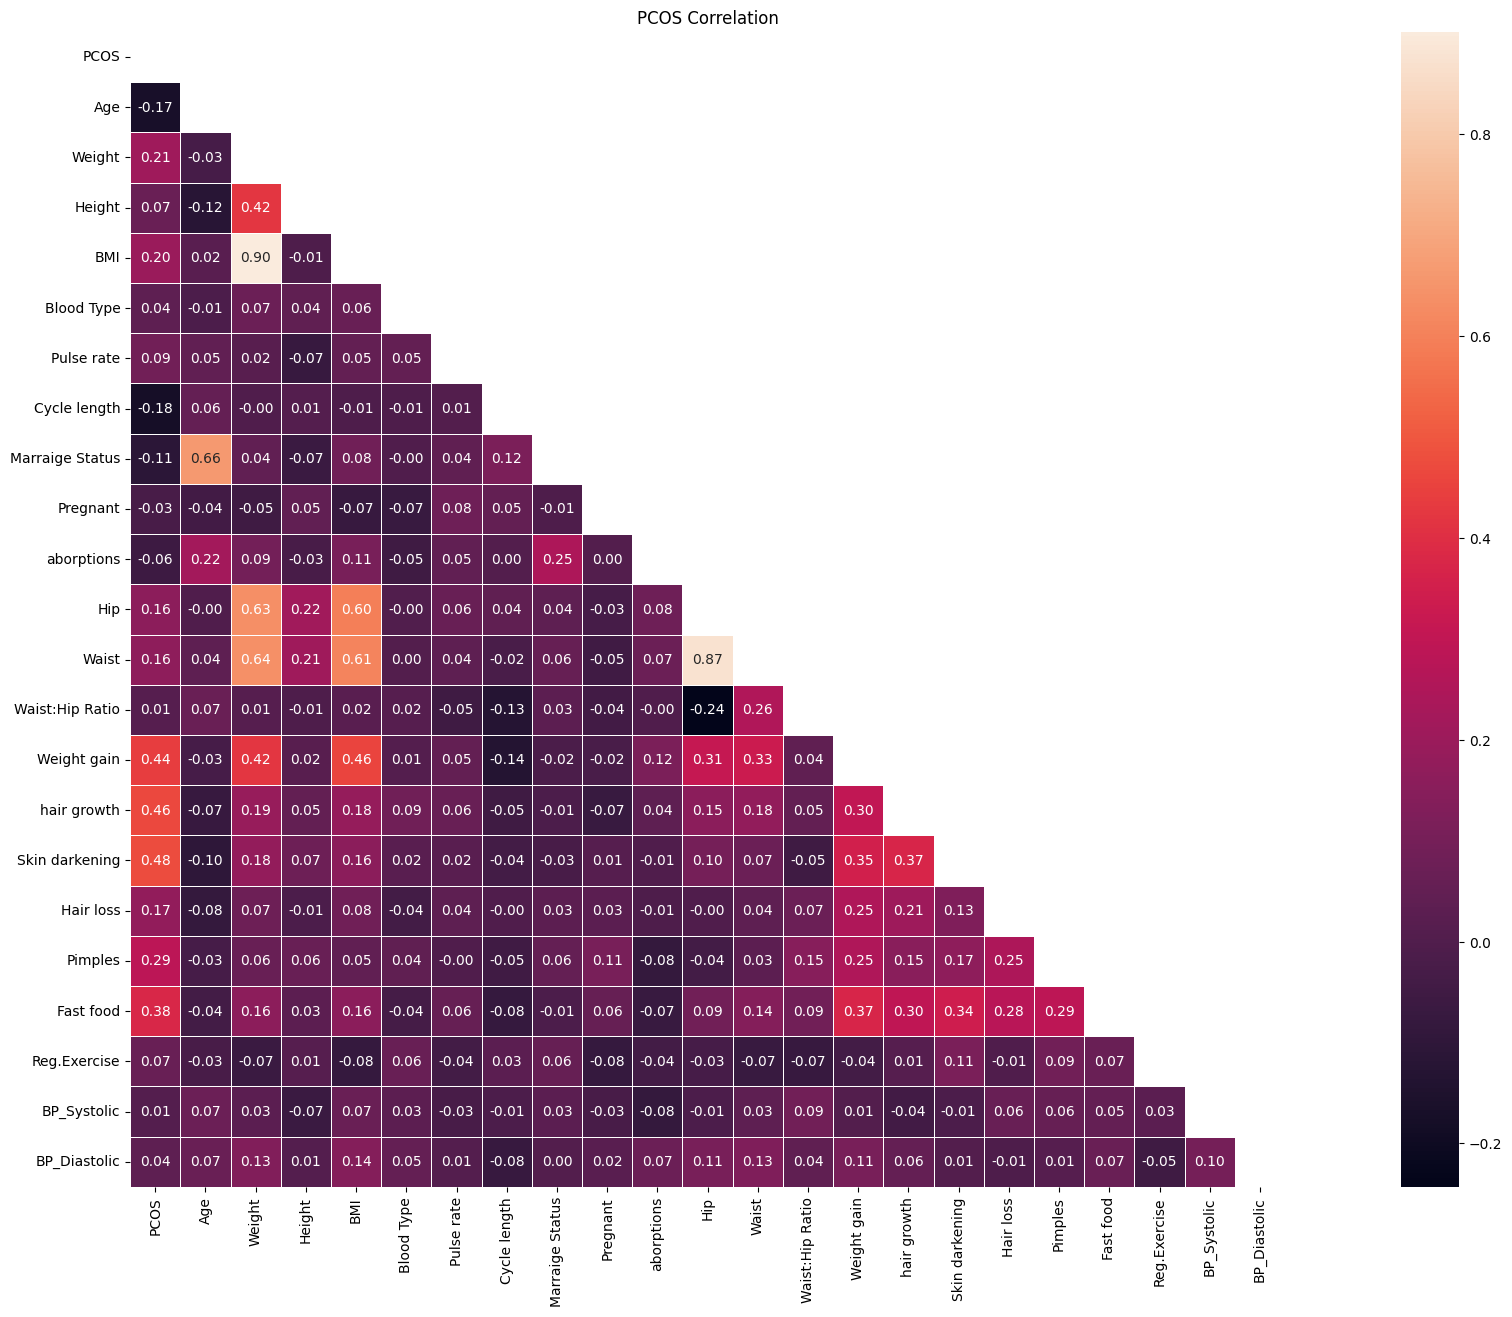

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

matrix = df_PCOS.corr()


plt.figure(figsize=(30,15))

# heatmap 절반만 보여주게 하기.
mask = np.zeros_like(matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(
    matrix,
     annot=True,
     mask=mask,
     linewidths= 0.5,
     square=True,
     fmt= '.2f'

     )
plt.title('PCOS Correlation')
plt.show()

# 타겟 컬럼 분포 확인

In [5]:
df_value_counts = df_PCOS['PCOS'].value_counts()
df_value_counts

0.0    364
1.0    177
Name: PCOS, dtype: int64

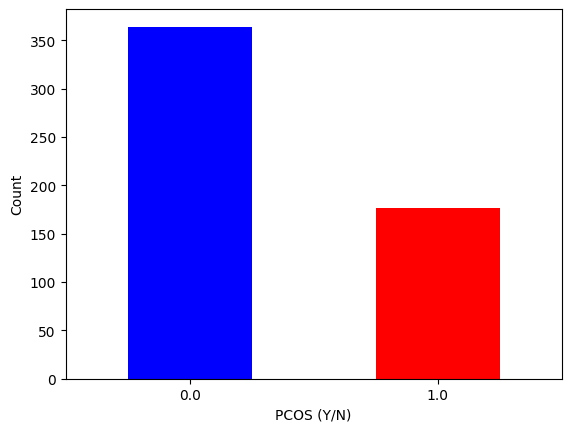

In [6]:
df_value_counts.plot(
    kind='bar',
    rot=0,
    color = ['blue','red']
)
plt.xlabel("PCOS (Y/N)")
plt.ylabel("Count")
plt.show()

# 0,1로 값이 정해져있는 칼럼과 수치를 입력해야하는 칼럼을 분리해서 출력해보기

In [7]:
pcos_categiry = ['PCOS','Blood Type', 'Pregnant', 'aborptions', 'Weight gain', 'hair growth','Skin darkening', 'Hair loss', 'Pimples', 'Fast food', 'Reg.Exercise',]

pcos_numerical = ['Age', 'Weight', 'Height', 'BMI','Pulse rate','Cycle length','Marraige Status','Hip','Waist', 'Waist:Hip Ratio','BP_Systolic', 'BP_Diastolic']

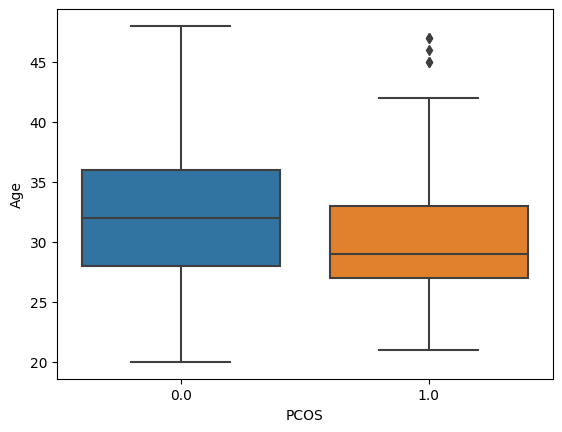

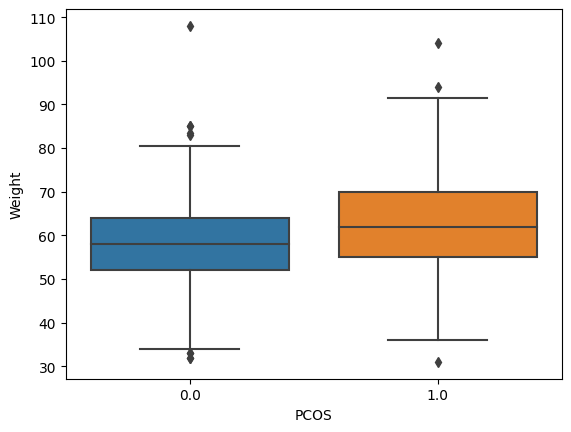

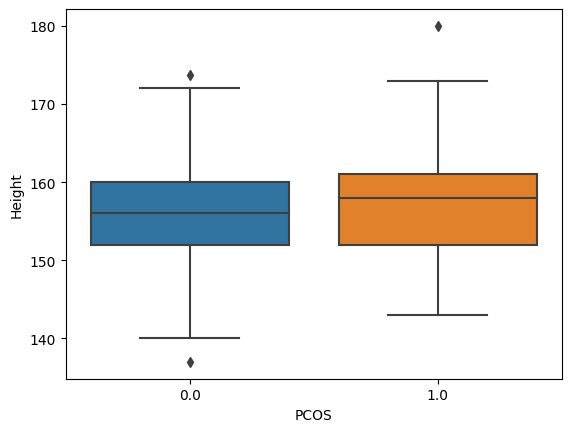

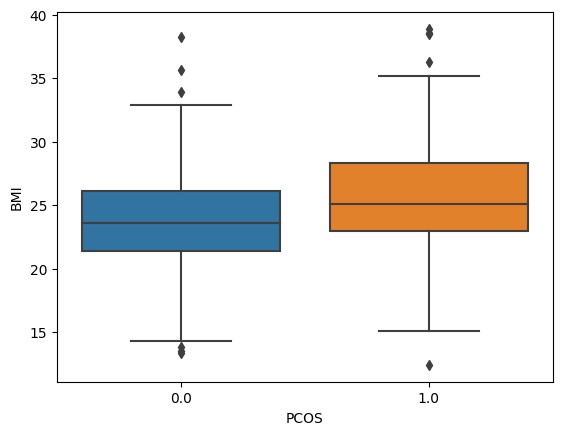

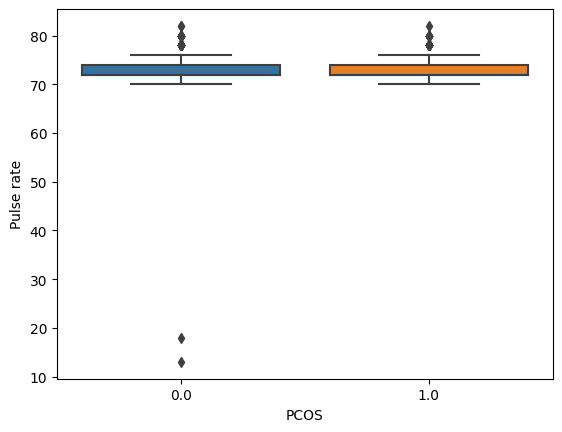

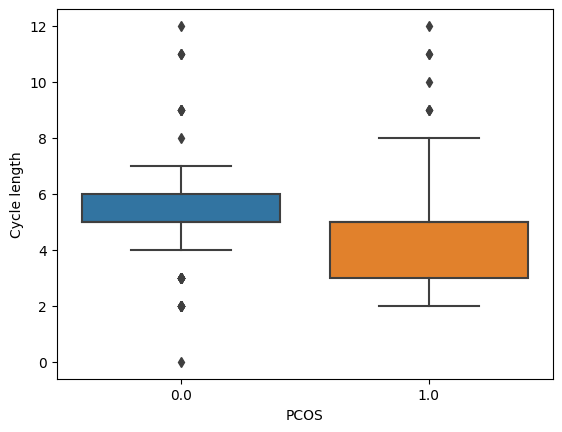

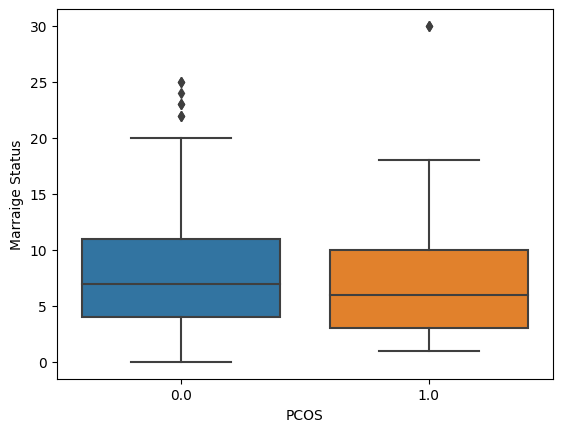

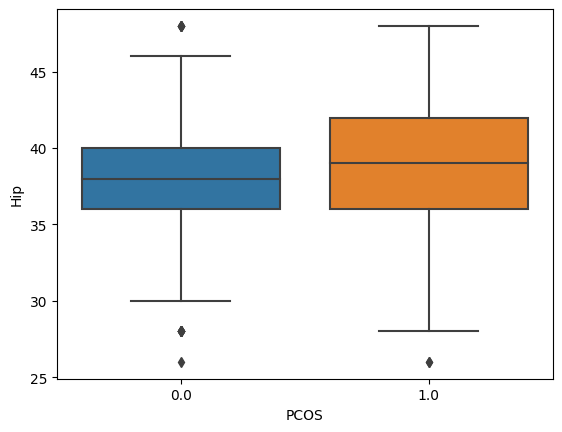

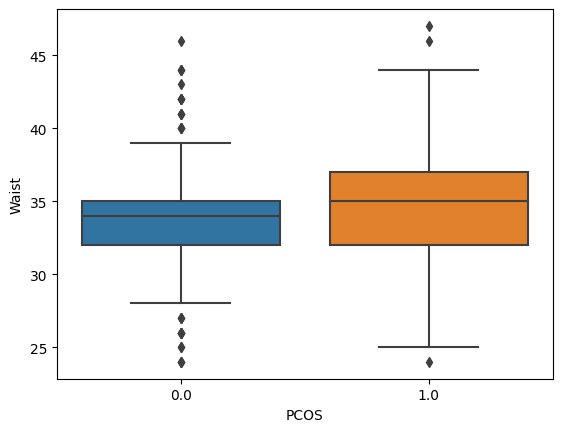

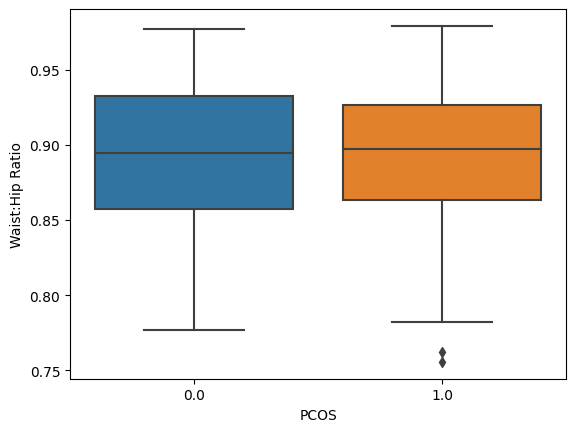

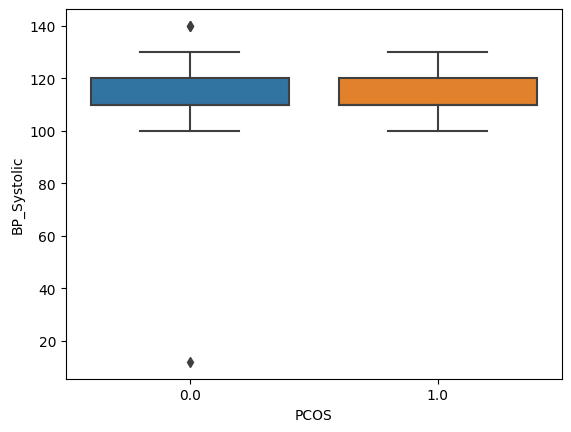

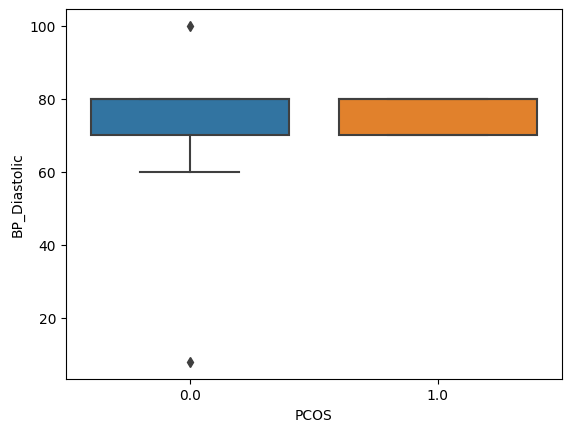

In [8]:
#다양한 값들이 나오는 칼럼들 boxplot 찍어보기
for cols in pcos_numerical:
    sns.boxplot(x="PCOS", y=cols,  data=df_PCOS)
    plt.show()

Age 는 다른 분포가 보임. 숫자로 범위 나눠서 보여줄 필요 있음  
Weight는 다른 분포가 보임. 숫자로 범위 나눠서 보여줄 필요가 있음  
Height는 다른 분포가 보임. 숫자로 범위 나눠서 보여줄 필요가 있음  
BMI다른 분포가 보임. 숫자로 범위 나눠서 보여줄 필요가 있음  
Pulse rate는 이상치 2개 제거하고 다시 찍어봄. 분포 비슷해서 의미없을듯  제거하기
Cycle length는 다른 분포가 보임. 범위 나눠서 보여줄 필요가 있음.  
Marraige Status는 거의 의미가 없는 데이터로 보임.  
Hip은 다른 분포가 보임. 숫자로 범위 나눠서 보여줄 필요가 있음  
Waist는 다른 분포가 보임. 숫자로 범위 나눠서 보여줄 필요가 있음  
Waist:Hip Ratio는 거의 비슷해서 보여줄 필요가 없을듯.  
BP_Systolic은 거의 비슷해서 보여줄 필요 없음  아래쪽 이상치 1개  
BP_Diastolic은 거의 비슷해서 보여줄 필요 없음  아래쪽 이상치 1개

### 이건 대략적인 설명을 제가 붙여놓은 것이고 설명을 그대로 붙이기보다는 그래프를 보여주면 될 것 같습니다.
### Pulse rate와 BP_Systolic, BP_Diastolic의 이상치는 확실히 이상하므로 제거하는 것이 맞고 나머지는 이상치가 아니라서 제거하지 않아도 됩니다.

In [9]:
# Pulse rate 이상치 제거하기
df_PCOS['Pulse rate'].sort_values(ascending=1)

296    13.0
223    18.0
455    70.0
147    70.0
359    70.0
       ... 
221    80.0
540    80.0
212    82.0
381    82.0
444    82.0
Name: Pulse rate, Length: 541, dtype: float64

In [10]:
df_PCOS.drop([296,223], inplace=True)
df_PCOS['Pulse rate'].sort_values(ascending=1)

455    70.0
147    70.0
359    70.0
72     70.0
269    70.0
       ... 
221    80.0
540    80.0
212    82.0
381    82.0
444    82.0
Name: Pulse rate, Length: 539, dtype: float64

In [11]:
#BP_Systolic이상치 제거하기
df_PCOS['BP_Systolic'].sort_values()

161     12.0
123    100.0
51     100.0
500    100.0
65     100.0
       ...  
260    130.0
429    130.0
181    130.0
179    140.0
365    140.0
Name: BP_Systolic, Length: 539, dtype: float64

In [12]:
df_PCOS.drop(161, inplace=True)
df_PCOS['BP_Systolic'].sort_values()

516    100.0
451    100.0
500    100.0
65     100.0
340    100.0
       ...  
260    130.0
429    130.0
181    130.0
179    140.0
365    140.0
Name: BP_Systolic, Length: 538, dtype: float64

In [13]:
#BP_Diastolic이상치 제거하기
df_PCOS['BP_Diastolic'].sort_values()

200      8.0
165     60.0
442     70.0
440     70.0
156     70.0
       ...  
207     80.0
206     80.0
217     80.0
270     80.0
365    100.0
Name: BP_Diastolic, Length: 538, dtype: float64

In [14]:
df_PCOS.drop(200, inplace=True)
df_PCOS['BP_Diastolic'].sort_values()

165     60.0
271     70.0
264     70.0
539     70.0
272     70.0
       ...  
258     80.0
257     80.0
255     80.0
266     80.0
365    100.0
Name: BP_Diastolic, Length: 537, dtype: float64

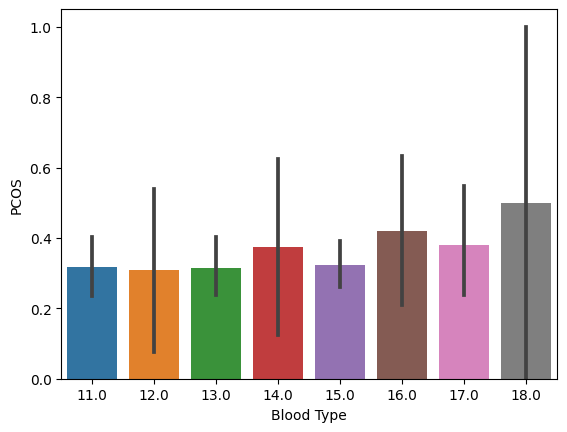

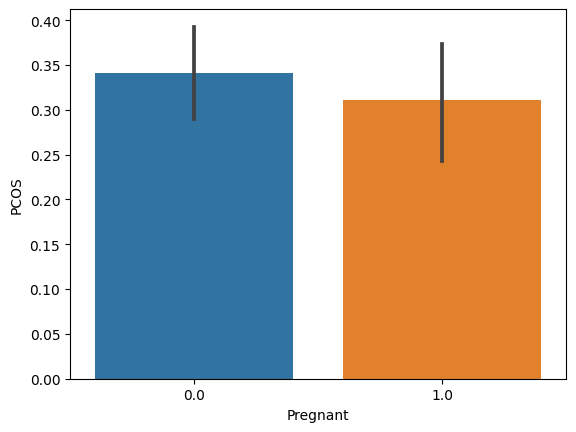

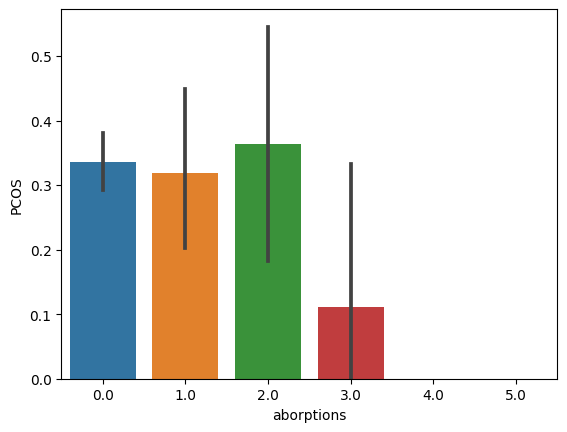

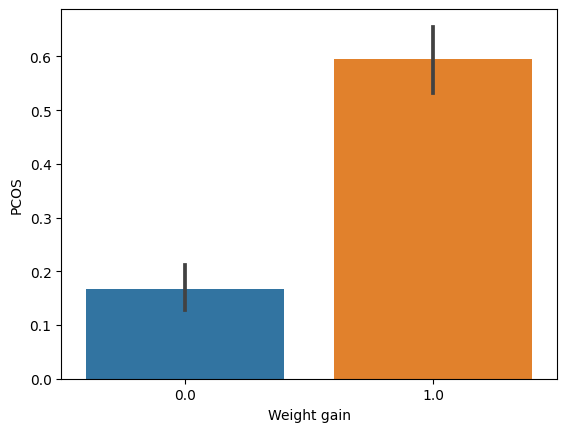

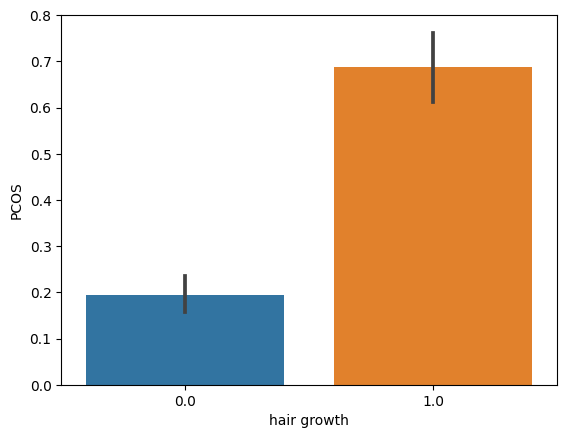

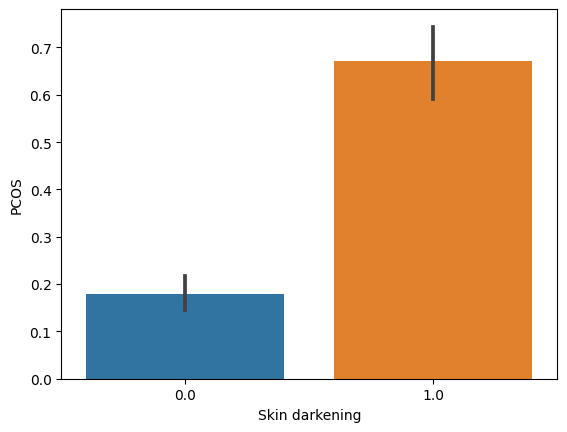

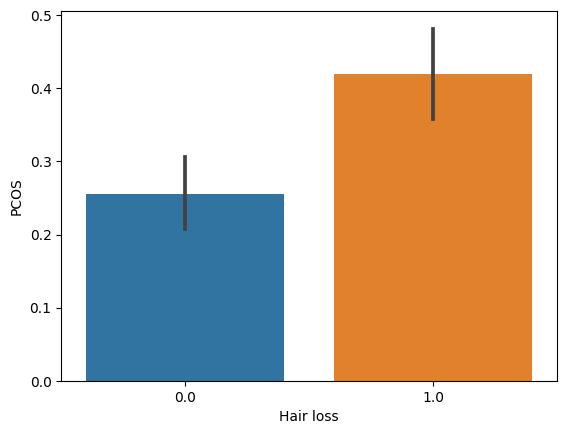

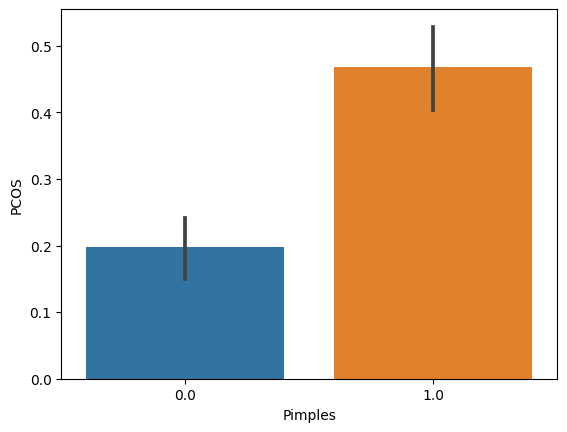

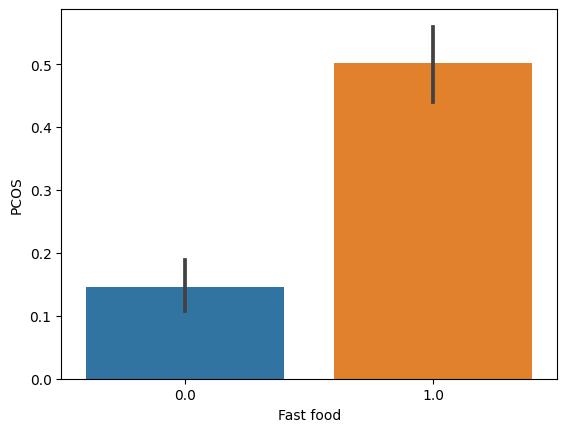

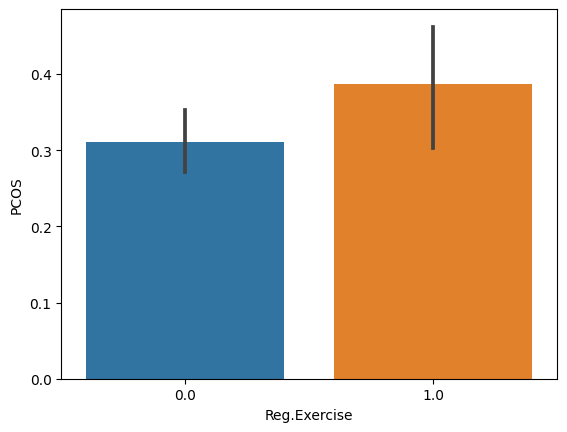

In [15]:
#범주형 데이터
for x in pcos_categiry[1:]:
    sns.barplot(x= x, y = "PCOS", data = df_PCOS)
    plt.show()

Blood Type 의미 없어보임  
Pregnant 의미 없어보임  
aborptions 의미 없어보임  
weight gain 의미 있음  
hair growth 의미 있음  
Skin darkening 의미 있음  
Hair loss 의미있음  
Pimples 의미 있음  
Fast food 의미 있음  
Reg.Exercise 의미 없어보임.  

### 이것 또한 대략적인 그래프를 보고 쓸만할 것 같다 아니다를 생각 한 것입니다. 비율이 비슷하면 의미 없고 좀 달라보이면 있다고 판단하였습니다.

In [16]:
df_PCOS.to_csv('../Data/pcos_remove.csv',index=None)